In [33]:
#import keras
#from keras.datasets import mnist
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [34]:
data=pd.read_csv('mnist.csv')


In [35]:
data=data.sample(3000,ignore_index=True)

In [36]:
def split(data,percent):
    np.random.seed(1)
    
    perm=np.random.permutation(data.index)
    train=int(len(data)*percent)
    
    X_train=data.iloc[perm[:train],:-1]
    X_test = data.iloc[perm[train:],:-1]
    
    y_train = data.iloc[perm[:train],-1]
    y_test =data.iloc[perm[train:],-1]
    
    return X_train.values , X_test.values , y_train.values, y_test.values

In [37]:
X_train, X_test, y_train, y_test = split(data, 0.8)

In [19]:
import cv2

In [39]:
len(X_train)

2400

In [27]:
def resize(x_train):
    x_new=[]
    for x in x_train:
        x=x.reshape(28,28)
        cv2.imwrite('img.png',x)
        img=cv2.imread('img.png')
        c=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        res=cv2.resize(c,(28,28))
        res=res.flatten()
        x_new.append(res)
    
    return np.array(x_new,dtype=np.int64)
    

In [28]:
new=resize(X_train)

In [32]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)

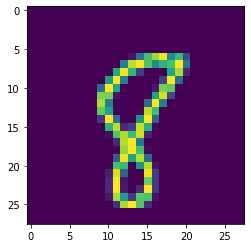

In [31]:
plt.imshow(new[3].reshape(28,28))

In [38]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(new, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(new, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(new, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(new, y_train)

In [133]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [43]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.34
Accuracy Polynomial Kernel: 0.6983333333333334
Accuracy Radial Basis Kernel: 0.11166666666666666
Accuracy Sigmoid Kernel: 0.695
